In [1]:
%pylab inline  
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('factbook.csv')
dataframe  = df.copy()

Выкинем строки с пропусками в основных параметрах

In [3]:
dataframe = dataframe[pd.notnull(dataframe['GDP']) & pd.notnull(dataframe['Unemployment rate(%)'])
                     &pd.notnull(dataframe['Death rate(deaths/1000 population)']) & pd.notnull(dataframe['Debt - external'])
                     &pd.notnull(dataframe['Area(sq km)']) &pd.notnull(dataframe['Population']) &
                     pd.notnull(dataframe['Exports'])&pd.notnull(dataframe['Birth rate(births/1000 population)'])]
dataframe = dataframe.iloc[1:] #Выкидываем первую строчку с типами переменных
dataframe

,Country,Area(sq km),Birth rate(births/1000 population),Current account balance,Death rate(deaths/1000 population),Debt - external,Electricity - consumption(kWh),Electricity - production(kWh),Exports,GDP,...,Oil - production(bbl/day),Oil - proved reserves(bbl),Population,Public debt(% of GDP),Railways(km),Reserves of foreign exchange & gold,Telephones - main lines in use,Telephones - mobile cellular,Total fertility rate(children born/woman),Unemployment rate(%)
3,Albania,28748,15.08,-504000000,5.12,1410000000,6760000000,5680000000,552400000,17460000000,...,2000,185500000,3563112,NaN,447,1206000000,255000,1100000,2.04,14.80
4,Algeria,2381740,17.13,11900000000,4.60,21900000000,23610000000,25760000000,32160000000,212300000000,...,1200000,11870000000,32531853,37.40,3973,43550000000,2199600,1447310,1.92,25.40
8,Anguilla,102,14.26,NaN,5.43,8800000,42600000,NaN,2600000,112000000,...,NaN,NaN,13254,NaN,NaN,NaN,6200,1800,1.73,8.00
10,Antigua and Barbuda,443,17.26,NaN,5.44,231000000,103000000,110800000,689000000,750000000,...,0,NaN,68722,NaN,NaN,NaN,38000,38200,2.26,11.00
11,Argentina,2766890,16.90,5473000000,7.56,157700000000,81650000000,81390000000,33780000000,483500000000,...,755000,2900000000,39537943,118.00,34091,19470000000,8009400,6500000,2.19,14.80
12,Armenia,29800,11.76,-240400000,8.16,905000000,5797000000,6492000000,850000000,13650000000,...,0,NaN,2982904,NaN,845,555000000,562600,114400,1.32,30.00
13,Aruba,193,11.26,NaN,6.57,285000000,751200000,807700000,128000000,1940000000,...,0,NaN,71566,NaN,NaN,NaN,37100,53000,1.79,0.60
15,Australia,7686850,12.26,-38300000000,7.44,308700000000,195600000000,210300000000,86890000000,611700000000,...,537500,3664000000,20090437,17.40,43802,35140000000,10815000,14347000,1.76,5.10
16,Austria,83870,8.81,-3283000000,9.70,15500000000,55090000000,58490000000,102700000000,255900000000,...,20670,85690000,8184691,64.20,6021,12730000000,3881000,7094500,1.36,4.40
17,Azerbaijan,86600,20.40,-2899000000,9.86,1832000000,17370000000,17550000000,3168000000,30010000000,...,312800,589000000,7911974,18.90,2957,875000000,923800,870000,2.44,1.20


Преобразуем типы переменных от строковых к численным

In [4]:
dataframe["Unemployment rate(%)"] = pd.to_numeric(dataframe["Unemployment rate(%)"])
dataframe["Area(sq km)"] = pd.to_numeric(dataframe["Area(sq km)"])
dataframe["Death rate(deaths/1000 population)"] = pd.to_numeric(dataframe["Death rate(deaths/1000 population)"])
dataframe["Debt - external"] = pd.to_numeric(dataframe["Debt - external"])
dataframe["GDP"] = pd.to_numeric(dataframe["GDP"])
dataframe["Exports"] = pd.to_numeric(dataframe["Exports"])
dataframe["Population"] = pd.to_numeric(dataframe["Population"])


Создадим новый датафрейм, в который вставим столбцы с выбранными признаками и применим K-means, сначала для 5 признаков, а потом для 9

         Country
Cluster         
0            151
1              1
2              1
3              1
4              9
                                                   Country
Cluster                                                   
0        AlbaniaAlgeriaAnguillaAntigua and BarbudaArgen...
1                                            United States
2                                           United Kingdom
3                                                    China
4        BrazilCanadaIndiaIndonesiaItalyKorea SouthMexi...


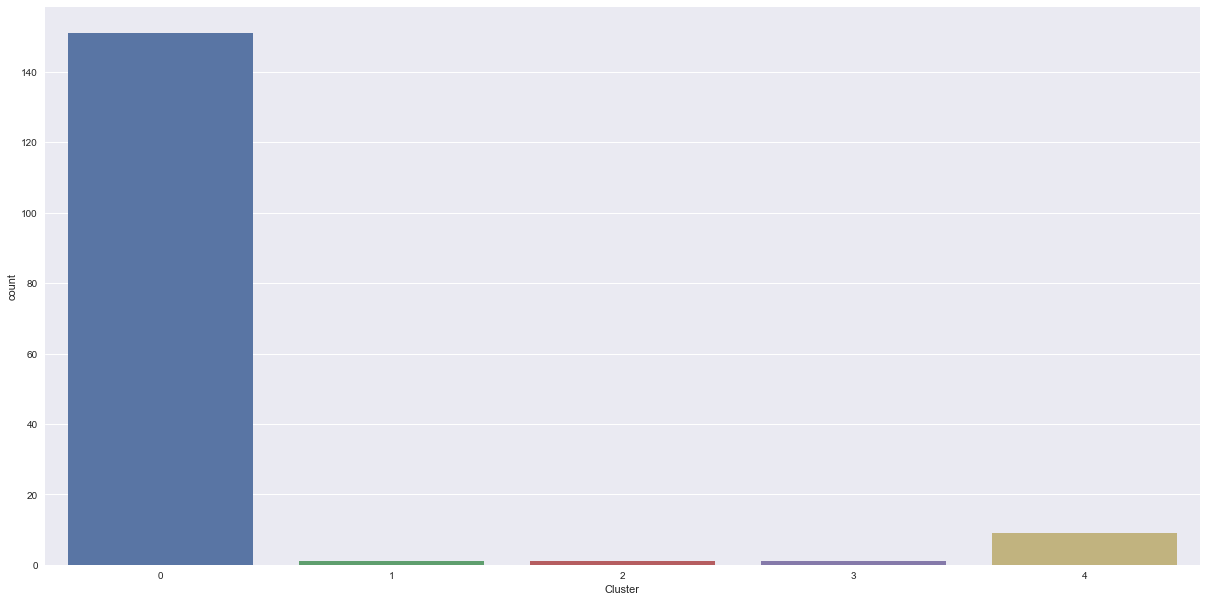

In [5]:
test_frame = pd.DataFrame()
test_frame['Death rate'] = dataframe["Death rate(deaths/1000 population)"]
test_frame['Unemployment rate'] = dataframe["Unemployment rate(%)"]
test_frame['Exports'] = dataframe["Exports"]
test_frame['Debt external'] = dataframe["Debt - external"]
test_frame['GDP'] = dataframe["GDP"]
test_frame['Population'] = dataframe["Population"]
test_frame['Area'] = dataframe["Area(sq km)"]
test_frame['Country'] = dataframe['Country']
test_frame.set_index("Country", inplace = True) 
dataset_array = test_frame.values

km = KMeans(n_clusters=5,n_init=10)
km.fit(dataset_array)

labels = km.labels_

results = pd.DataFrame([test_frame.index,labels]).T
results.columns = ['Country', 'Cluster']


clusters = results.groupby(['Cluster'])
print(clusters.count())
print(clusters.sum())
sns.set(rc={'figure.figsize':(20.7,10.27)})
ax = sns.countplot(x="Cluster",data=results)

         Country
Cluster         
0            114
1              1
2              1
3              1
4             10
5              1
6             28
7              4
8              3
                                                   Country
Cluster                                                   
0        AlbaniaAnguillaAntigua and BarbudaArmeniaAruba...
1                                                    China
2                                            United States
3                                           United Kingdom
4        ArgentinaAustraliaIndonesiaIranPhilippinesPola...
5                                                    India
6        AlgeriaAustriaBangladeshBelgiumChileColombiaCz...
7                            BrazilKorea SouthMexicoRussia
8                                         CanadaItalySpain


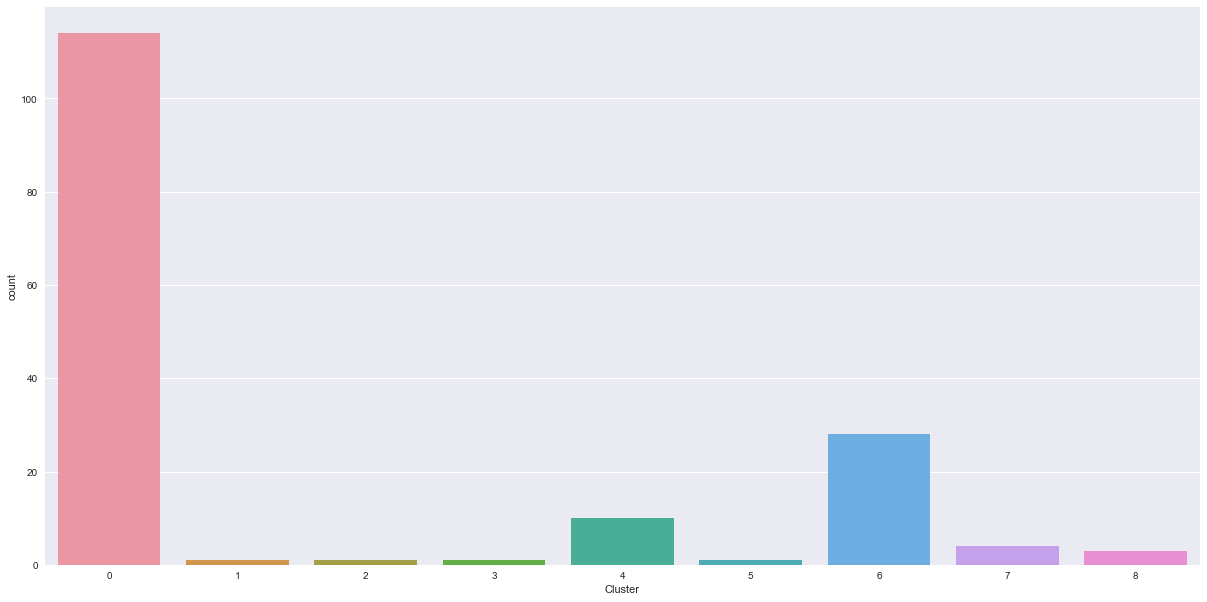

In [10]:
km = KMeans(n_clusters=9,n_init=10)
km.fit(dataset_array)

labels = km.labels_

results = pd.DataFrame([test_frame.index,labels]).T
results.columns = ['Country', 'Cluster']


clusters = results.groupby(['Cluster'])
print(clusters.count())
print(clusters.sum())
sns.set(rc={'figure.figsize':(20.7,10.27)})
ax = sns.countplot(x="Cluster",data=results)